In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools

from matplotlib import pyplot as plt

%matplotlib inline

/Users/mathildebadoual/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Mixture models

In [2]:
mus = [0.5,1,2.5,5,6,7]
# sigmas = [1,1,1,0.5,0.5,0.5,0.5]
sigmas = [1,1,1,2,2,2,2]
freqs = [.99,0.1,5./365,5./3650,1./3650,1./36500]
# freqs = [100 for x in mus]
labels = ['Blue Sky','SNAFU (sometimes)','Stormy (5x per year)','Superstorm (1 every 2 years)','Earthquake (1 every 10 years)','Tsunami (1 every 100 years)']
samples = []
for mu, sig, freq in zip(mus, sigmas, freqs):
    samples.append(np.random.lognormal(mu, sig, int(10000000*freq)))


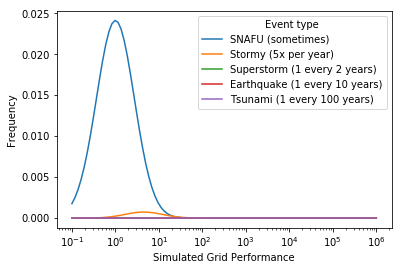

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [4]:
fig, ax = plt.subplots()
for mu, sig, freq, sample, label in zip(mus, sigmas, freqs, samples, labels):
    if label == 'Blue Sky':
        continue
#     ax.hist(samp, histtype='stepfilled', bins=np.logspace(-1,6,100), alpha=0.5, label=label)
    ax.plot(np.logspace(-1,6,100), freq*stats.lognorm.pdf(np.logspace(-1,6,100), *stats.lognorm.fit(sample)), label=label)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Simulated Grid Performance')
ax.set_ylabel('Frequency')
plt.legend(title='Event type')
plt.show()
# assert False
Rvals = []
n = 365*10
# fig, ax = plt.subplots()
sample_from = list(itertools.chain(*samples))
for x in range(1000):
    days = np.random.choice(sample_from, n)
    Rvals.append(sum(days)/1e3)
    if x % 10 == 0:
        print(x)
#     ax.hist(days, histtype='step', bins=np.logspace(-1,5,100), alpha=0.5,  )#label='R=%i'%(sum(days)/1e3))
# ax.set_xscale('log')
# plt.legend()


# fig, ax = plt.subplots()
# # for mu, sig, samp in zip(mus, sigmas, samples):
# ax.hist(samples, stacked=True, histtype='stepfilled', bins=np.logspace(-1,5,1000), alpha=0.5, label=r'$\mu=%.1f, \sigma=%.1f$'%(mu,sig))

# mu = np.mean(np.log(list(itertools.chain(*samples))))
# sig = np.std(np.log(list(itertools.chain(*samples))))

# ax2 = ax.twinx()
# ax2.plot(np.logspace(-1,5,1000), stats.lognorm.pdf(np.logspace(-1,5,1000), mu, sig))#*stats.lognorm.fit(list(itertools.chain(*samples)))))
# ax2.set_xscale('log')
# ax.set_xlim(1e-1,1e5)
# ax2.set_xlim(1e-1,1e5)
# ax.set_xscale('log')
# plt.legend()

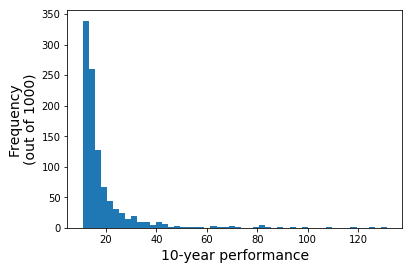

In [5]:

fig, ax = plt.subplots()
ax.set_xlabel('10-year performance', fontsize=14)
ax.set_ylabel('Frequency\n(out of 1000)', fontsize=14)
ax.hist(Rvals, bins=50)
plt.show()

In [50]:
list(itertools.chain(*samples))

[12.23908931376618,
 1.107075545442037,
 0.2237216383092547,
 0.7798802546348151,
 2.0021622746050625,
 4.705116894941785,
 2.782979865053051,
 1.3986796936759358,
 0.8398802479290437,
 0.185447680016083,
 1.6440735231741368,
 0.23907534942604014,
 3.2484611789521134,
 0.12691283250292132,
 0.5976005333367167,
 4.679622168276239,
 3.582376672314013,
 1.250930194133557,
 0.9435824632511806,
 1.7505748376227106,
 2.762937646836277,
 4.4472401072538545,
 2.558924727167992,
 1.5623197016217036,
 1.6872331421953637,
 0.37953545375013775,
 0.8593415333000924,
 2.1185065684138187,
 0.5632046525439924,
 6.713602193027474,
 1.6876505473716659,
 17.172327382791856,
 3.80246624787653,
 3.551588579237875,
 0.5602420968342721,
 0.7170379917535366,
 2.377211141826526,
 0.5986417726350891,
 2.1028751483041592,
 5.030074730883196,
 13.00831248654796,
 0.4859062632019567,
 0.702098771777336,
 1.613478032073559,
 0.8868793840951863,
 2.9618720163129733,
 4.435870900972337,
 5.369574933649193,
 0.3760995

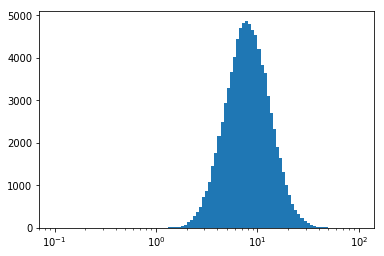

0.9881346761480521 66.82131345389107 9.047719492179732


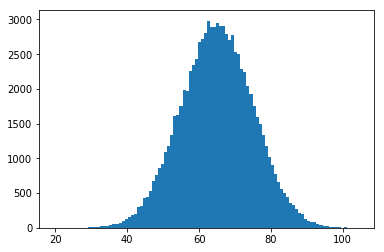

19.7808831082721 104.53889369663298 64.96554932132071


In [137]:
wind = np.exp(.5*stats.norm.rvs(size=10*8760)+np.log(8))
temp = stats.truncnorm.rvs(20-65, 105-65, scale=10, size=10*8760)+65

var = wind
fig, ax = plt.subplots()
ax.hist(var, bins=np.logspace(-1,2,100))
ax.set_xscale('log')
plt.show()

print var.min(), var.max(), np.mean(var)


var = temp
fig, ax = plt.subplots()
ax.hist(var, bins=100)
# ax.set_xscale('log')
plt.show()

print var.min(), var.max(), np.mean(var)


In [54]:

fig, ax = plt.subplots()
ax.plot(np.range(0,25), sig(np.range(0,25), ))

(-3.8946230199196448, 3.9389091878581532, -0.002859684509249157)

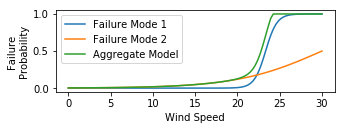

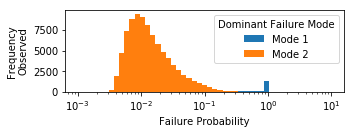

In [147]:
sig = lambda x, s, p: np.exp(s*x-p)/(np.exp(s*x-p)+1)

xvals = np.linspace(0,30,100)
f1 = sig(xvals, 1.5, 35)
f2 = sig(xvals, 0.2, 6)
ftot = f1 + f2
ftot[ftot>1] = 1

fig, ax = plt.subplots(figsize=(5,1.5))
ax.plot(xvals, f1, label='Failure Mode 1')
# plt.show()

# fig, ax = plt.subplots()
xvals = np.linspace(0,30,100)
ax.plot(xvals, f2, label='Failure Mode 2')

# fig, ax = plt.subplots()
ax.plot(xvals, ftot, label='Aggregate Model')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Failure\nProbability')
plt.legend()
plt.show()


f1 = sig(wind, 1.5, 35)
f2 = sig(wind, 0.2, 6)
ftot = f1 + f2
ftot[ftot>1] = 1

fig, ax = plt.subplots(figsize=(5,1.5))
idx = f1 > f2
ax.hist(ftot[idx], bins=np.logspace(-3,1, 50), stacked=True, label='Mode 1')
ax.hist(ftot[~idx], bins=np.logspace(-3,1, 50), stacked=True, label='Mode 2')
ax.set_xscale('log')
ax.set_xlabel('Failure Probability')
ax.set_ylabel('Frequency\nObserved')
plt.legend(title='Dominant Failure Mode')
plt.show()

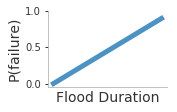

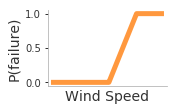

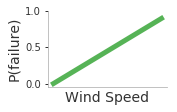

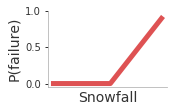

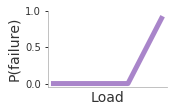

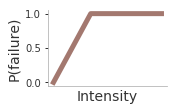

In [3]:
import seaborn as sns

xvals = range(0,50)
yvals = [0 if x < 20 else 1 if x > 30 else 0.1*(x-20) for x in xvals]

failure_modes = {'High Wind': (0,40), 'Storm Surge': (20,30), 'Ice Accumulation': (10,30), 
                 'Trees Falling': (20,30), 'Transformer Blow': (0,30), 'Earthquake': (20,50)}

dependent_vars = {'High Wind': 'Wind Speed', 'Storm Surge': 'Flood Duration', 'Ice Accumulation': 'Snowfall', 
                 'Trees Falling': 'Wind Speed', 'Transformer Blow': 'Load', 'Earthquake': 'Intensity'}

colors = sns.color_palette()

for i, key in enumerate(failure_modes):
    x0, x1 = failure_modes[key]

    fig, ax = plt.subplots(figsize=(2.75,1.5))
#     ax.set_title(key, color='0.3', fontsize=14)
    ax.plot(xvals[x0:x1], yvals[x0:x1], alpha=0.8, lw=5, color=colors[i])
    ax.set_xlabel(dependent_vars[key], color='0.2', fontsize=14)
#     ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks(np.arange(0,1.1,0.5))
    ax.set_ylabel(r'P(failure)', color='0.2', fontsize=14)
    ax.tick_params(labelsize=10, labelcolor='0.2')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('0.7')
    ax.spines['left'].set_color('0.7')
    fig.subplots_adjust(left=0.3, top=0.9, bottom=0.2)
    plt.savefig('figures/fragility_curves/%s_fragility.png'%(key.split(' ')[0].lower()))
    plt.show()

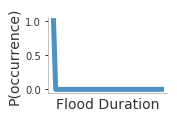

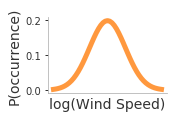

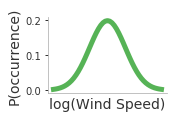

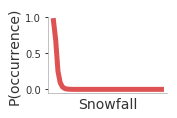

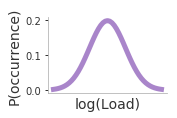

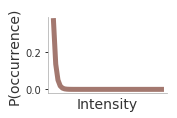

In [45]:
import seaborn as sns

xvals = range(1,50)
yvals = [0 if x < 20 else 1 if x > 30 else 0.1*(x-20) for x in xvals]

failure_modes = {'High Wind': 0.5*stats.norm.pdf(np.linspace(-3,3,len(xvals))), 
                 'Storm Surge': [1,]+[0 for x in xvals[1:]], 
                 'Ice Accumulation': [0.95,]+ list(5*np.exp(-1*np.array(xvals[1:]))), 
                 'Trees Falling': 0.5*stats.norm.pdf(np.linspace(-3,3,len(xvals))), 'Transformer Blow': 0.5*stats.norm.pdf(np.linspace(-3,3,len(xvals))), 
                 'Earthquake': np.exp(-1*np.array(xvals))}

dependent_vars = {'High Wind': 'log(Wind Speed)', 'Storm Surge': 'Flood Duration', 'Ice Accumulation': 'Snowfall', 
                 'Trees Falling': 'log(Wind Speed)', 'Transformer Blow': 'log(Load)', 'Earthquake': 'Intensity'}

colors = sns.color_palette()

for i, key in enumerate(failure_modes):
    if len(failure_modes[key]) == 2:
        x0, x1 = failure_modes[key]
        _yvals = yvals[x0:x1]
        _xvals = xvals[x0:x1]
    else:
        _yvals = failure_modes[key]
        _xvals = list(xvals)
    fig, ax = plt.subplots(figsize=(2.75,1.5))
#     ax.set_title(key, color='0.3', fontsize=14)
    ax.plot(_xvals, _yvals, alpha=0.8, lw=5, color=colors[i])
    ax.set_xlabel(dependent_vars[key], color='0.2', fontsize=14)
#     ax.set_frame_on(False)
    ax.set_xticks([])
#     ax.set_yticks(np.arange(0,1.1,0.5))
    ax.set_ylabel(r'P(occurrence)', color='0.2', fontsize=14)
    ax.tick_params(labelsize=10, labelcolor='0.2')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('0.7')
    ax.spines['left'].set_color('0.7')
    fig.subplots_adjust(left=0.3, top=0.9, bottom=0.2)
    plt.savefig('figures/probabilities/%s_probability.png'%(key.split(' ')[0].lower()))
    plt.show()

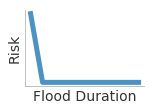

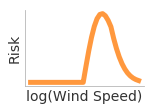

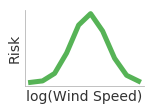

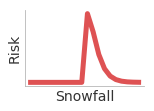

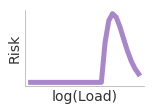

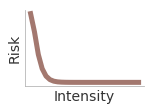

In [51]:
import seaborn as sns

xvals = range(1,50)
yvals = [0 if x < 20 else 1 if x > 30 else 0.1*(x-20) for x in xvals]

fragility_models = {'High Wind': (0,40), 'Storm Surge': (20,30), 'Ice Accumulation': (10,30), 
                 'Trees Falling': (20,30), 'Transformer Blow': (0,30), 'Earthquake': (20,50)}

# fragility_models = {'High Wind': (0,40), 'Storm Surge': (20,30), 'Ice Accumulation': (10,30), 
#                  'Trees Falling': (20,30), 'Transformer Blow': (0,30), 'Earthquake': (20,50)}

lengths = {'High Wind': 40, 'Storm Surge': 10, 'Ice Accumulation': 20, 
                 'Trees Falling': 10, 'Transformer Blow': 30, 'Earthquake': 30}


probabilities = {'High Wind': 0.5*stats.norm.pdf(np.linspace(-3,3,40)), 
                 'Storm Surge': [1,]+[0 for x in range(10-1)], 
                 'Ice Accumulation': [0.95,]+ list(5*np.exp(-1*np.array(xvals[11:30]))), 
                 'Trees Falling': 0.5*stats.norm.pdf(np.linspace(-3,3,10)), 
                 'Transformer Blow': 0.5*stats.norm.pdf(np.linspace(-3,3,30)), 
                 'Earthquake': np.exp(-1*np.array(xvals[20:50]))
                }

dependent_vars = {'High Wind': 'log(Wind Speed)', 'Storm Surge': 'Flood Duration', 'Ice Accumulation': 'Snowfall', 
                 'Trees Falling': 'log(Wind Speed)', 'Transformer Blow': 'log(Load)', 'Earthquake': 'Intensity'}

colors = sns.color_palette()

for i, key in enumerate(probabilities):
    x0, x1 = fragility_models[key]

    fig, ax = plt.subplots(figsize=(2.75,1.5))
#     ax.set_title(key, color='0.3', fontsize=14)
    ax.plot(xvals[x0:x1], np.array(yvals[x0:x1])*probabilities[key], alpha=0.8, lw=5, color=colors[i])
    ax.set_xlabel(dependent_vars[key], color='0.2', fontsize=14)
#     ax.set_frame_on(False)
    ax.set_xticks([])
#     ax.set_yticks(np.arange(0,1.1,0.5))
    ax.set_ylabel(r'Risk', color='0.2', fontsize=14)
    ax.tick_params(labelsize=10, labelcolor='0.2')
    ax.set_yticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color('0.7')
    ax.spines['left'].set_color('0.7')
    fig.subplots_adjust(left=0.3, top=0.9, bottom=0.2)
    plt.savefig('figures/risk/%s_risk.png'%(key.split(' ')[0].lower()))
    plt.show()